# Digital Image Processing Exercise 4_3

Dr. Rahmati

By: Gholamreza Dar

Summer 2022

In [19]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

import cv2


In [20]:


## Functions
def rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def uint8ify(img):
    img -= img.min()
    img /= img.max()
    img *= 255
    return np.uint8(img)

def overlay(a,b):
    # a and b should be float images and between 0-1

    mask = a >= 0.5 # generate boolean mask of everywhere a > 0.5 
    ab = np.zeros_like(a) # generate an output container for the blended image 

    # now do the blending 
    ab[~mask] = (2*a*b)[~mask] # 2ab everywhere a<0.5
    ab[mask] = (1-2*(1-a)*(1-b))[mask] # else this
    
    return ab

def disp(img, title='', s=8, vmin=None, vmax=None):
    plt.figure(figsize=(s,s))
    plt.axis('off')
    if vmin is not None and vmax is not None:
        plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()
    
def before_after(img_a, img_b, name="", vmin=None, vmax=None, effect_name="Processed"):
    fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(8,8))
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].set_title(f"{name} Original")
    axs[1].set_title(f"{name} {effect_name}")
    if vmin is not None and vmax is not None:
        axs[0].imshow(img_a, cmap='gray', vmin=vmin, vmax=vmax)
        axs[1].imshow(img_b, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        axs[0].imshow(img_a, cmap='gray')
        axs[1].imshow(img_b, cmap='gray')
    plt.show()

def debug_control_points(img, src_pts):
    img_rgb = np.repeat(img[:,:,np.newaxis], 3, axis=-1)

    cv2.circle(img_rgb, src_pts[0].astype(np.int32), 10, (255,0,0), -1)
    cv2.circle(img_rgb, src_pts[1].astype(np.int32), 10, (0,255,0), -1)
    cv2.circle(img_rgb, src_pts[2].astype(np.int32), 10, (0,0,255), -1)
    cv2.circle(img_rgb, src_pts[3].astype(np.int32), 10, (255,255,0), -1)

    cv2.circle(img_rgb, ((src_pts[0]+src_pts[3])/2).astype(np.int32), 5, (255,0,255), -1)
    cv2.circle(img_rgb, ((src_pts[1]+src_pts[2])/2).astype(np.int32), 5, (255,0,255), -1)

    cv2.circle(img_rgb, ((src_pts[0]+src_pts[1])/2).astype(np.int32), 5, (0,255,255), -1)
    cv2.circle(img_rgb, ((src_pts[2]+src_pts[3])/2).astype(np.int32), 5, (0,255,255), -1)

    disp(uint8ify(img_rgb), "Control Points")

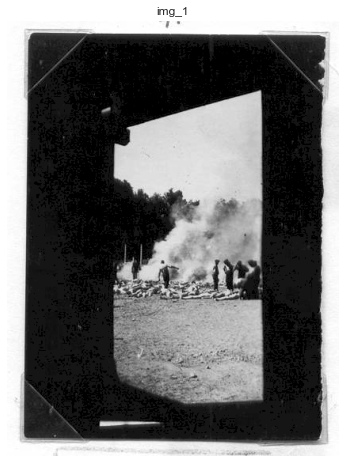

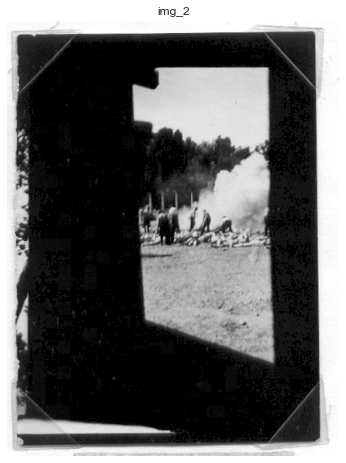

In [21]:

## Loading Images
img_1 = cv2.imread('inputs/P3/sonderkommando_photographs_280.png', 0).astype(np.float32)
img_2 = cv2.imread('inputs/P3/sonderkommando_photographs_281.png', 0).astype(np.float32)

disp(img_1, 'img_1')
disp(img_2, 'img_2')

## Image 1

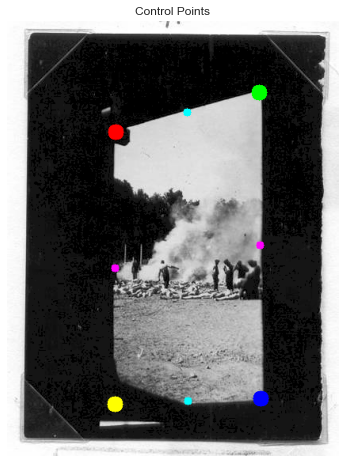

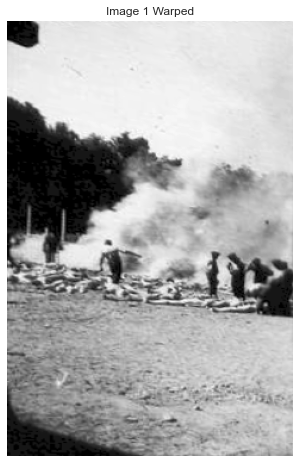

In [22]:
src_pts = np.array([[137, 140], [318, 90], [320, 477], [136, 484]], dtype=np.float32)

# Debug Points
debug_control_points(img_1, src_pts)

# Calculate new width and height
new_width = int((np.linalg.norm((src_pts[0]+src_pts[3])/2 - (src_pts[1]+src_pts[2])/2))*1.3)
new_height = int(np.linalg.norm((src_pts[0]+src_pts[1])/2 - (src_pts[2]+src_pts[3])/2))

dst_pts = np.array([[0, 0], [new_width, 0], [new_width, new_height], [0, new_height]], dtype=np.float32)

M = cv2.getPerspectiveTransform(src_pts, dst_pts)
img_1_warped = cv2.warpPerspective(img_1, M, (new_width, new_height))

disp(img_1_warped, "Image 1 Warped")

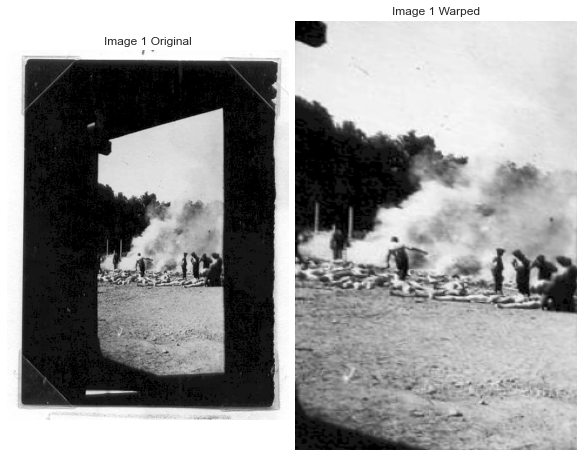

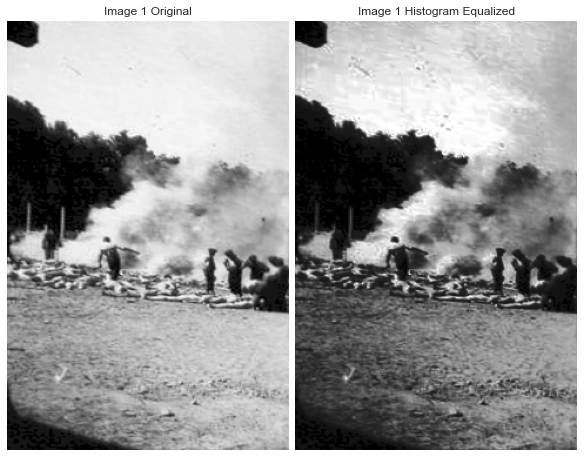

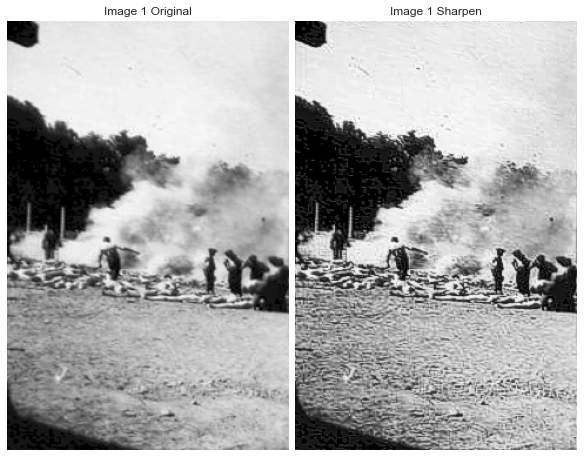

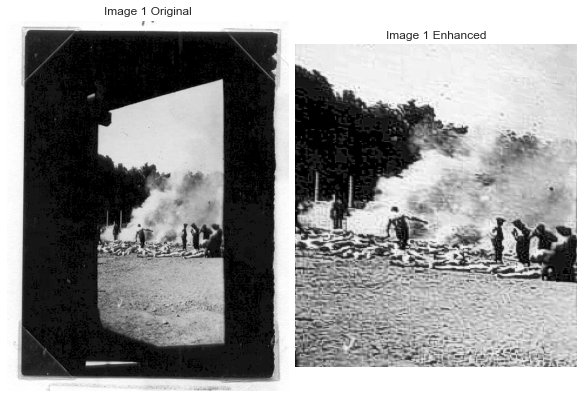

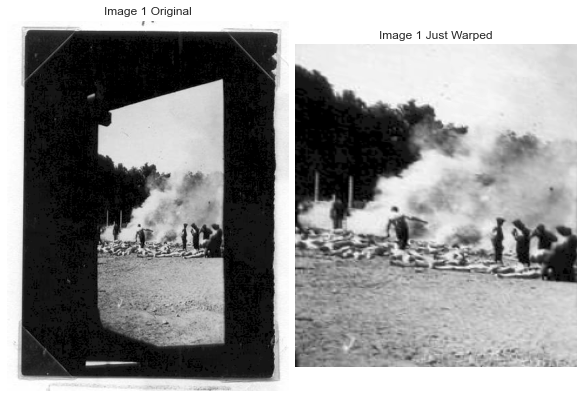

In [23]:
# Enhance Contrast
# TODO
before_after(img_1, img_1_warped, "Image 1", effect_name="Warped")

img_1_warped_hist_eq = cv2.equalizeHist(uint8ify(img_1_warped))
before_after(img_1_warped, img_1_warped_hist_eq, "Image 1", effect_name="Histogram Equalized" )

kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img_1_sharpen = cv2.filter2D(uint8ify(img_1_warped.astype(np.float32)),-1, kernel)
cv2.addWeighted(uint8ify(img_1_warped.astype(np.float32)), 0.65, uint8ify(img_1_sharpen.astype(np.float32)), 0.35, 0, img_1_sharpen)
before_after(img_1_warped, img_1_sharpen, "Image 1", effect_name="Sharpen")

h, w = img_1_sharpen.shape
before_after(img_1, img_1_sharpen[h//8:h-h//8, :], "Image 1", effect_name="Enhanced")
before_after(img_1, img_1_warped[h//8:h-h//8, :], "Image 1", effect_name="Just Warped")

## Image 2

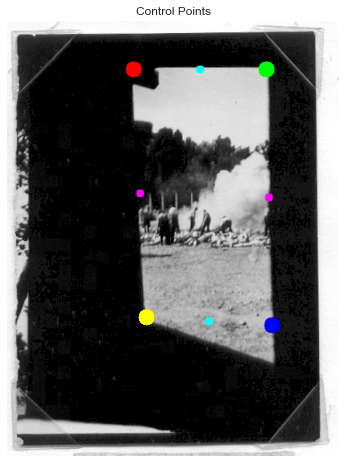

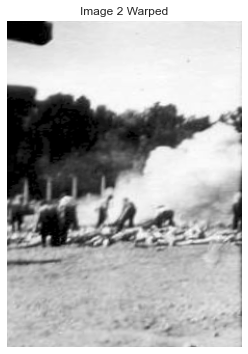

In [24]:
src_pts = np.array([[158,60], [324, 60], [331, 380], [174, 370]], dtype=np.float32)

# Debug Points
debug_control_points(img_2, src_pts)

# Calculate new width and height
new_width = int((np.linalg.norm((src_pts[0]+src_pts[3])/2 - (src_pts[1]+src_pts[2])/2))*1.4)
new_height = int(np.linalg.norm((src_pts[0]+src_pts[1])/2 - (src_pts[2]+src_pts[3])/2))

dst_pts = np.array([[0, 0], [new_width, 0], [new_width, new_height], [0, new_height]], dtype=np.float32)

M = cv2.getPerspectiveTransform(src_pts, dst_pts)
img_2_warped = cv2.warpPerspective(img_2, M, (new_width, new_height))

disp(img_2_warped, "Image 2 Warped",s=6)

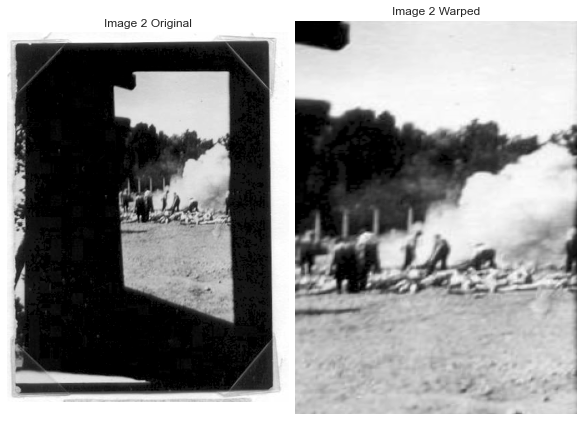

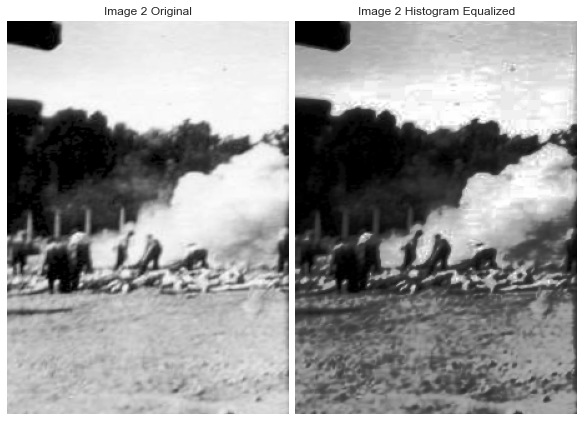

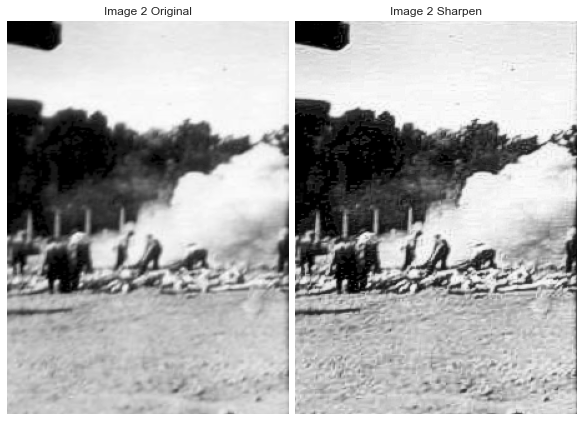

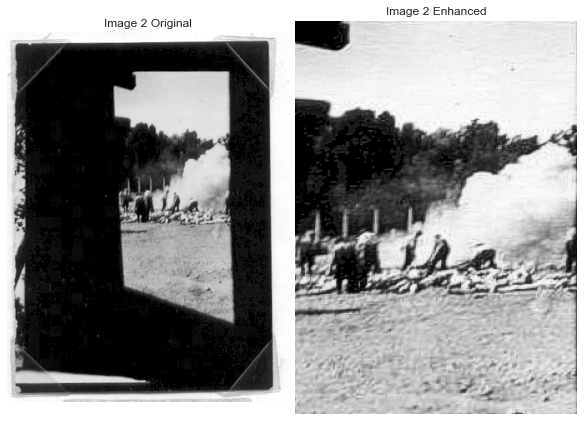

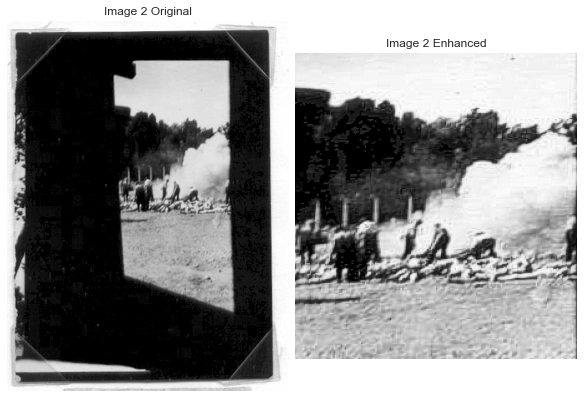

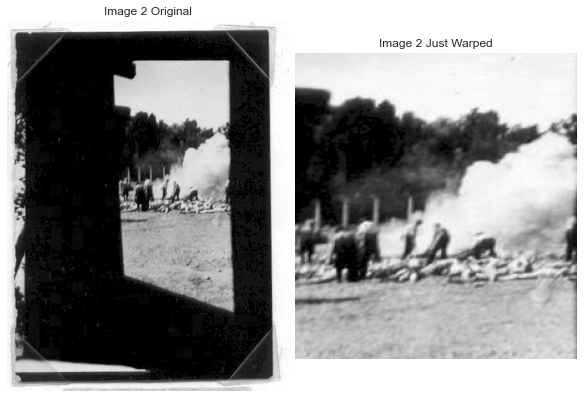

In [25]:
# Enhance Contrast
# TODO
before_after(img_2, img_2_warped, "Image 2", effect_name="Warped")

img_2_warped_hist_eq = cv2.equalizeHist(uint8ify(img_2_warped))
before_after(img_2_warped, img_2_warped_hist_eq, "Image 2", effect_name="Histogram Equalized" )

kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img_2_sharpen = cv2.filter2D(uint8ify(img_2_warped.astype(np.float32)),-1, kernel)
cv2.addWeighted(uint8ify(img_2_warped.astype(np.float32)), 0.65, uint8ify(img_2_sharpen.astype(np.float32)), 0.35, 0, img_2_sharpen)
before_after(img_2_warped, img_2_sharpen, "Image 2", effect_name="Sharpen")
before_after(img_2, img_2_sharpen, "Image 2", effect_name="Enhanced")

h, w = img_2_sharpen.shape
before_after(img_2, img_2_sharpen[h//9:h-h//9, :], "Image 2", effect_name="Enhanced")
before_after(img_2, img_2_warped[h//9:h-h//9, :], "Image 2", effect_name="Just Warped")